# NYC EMS Incidents 2013-2017

https://data.cityofnewyork.us/Public-Safety/EMS-Incident-Dispatch-Data/76xm-jjuj

Use Case: Predict number of EMS calls incidents in order to be adequately prepared to handle all of them. 

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime
import itertools
import warnings

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import Grouper
from matplotlib.pylab import rcParams

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

# DO NOT RUN the following cells, we used them to clean a big nasty CSV and create a new cleaner one which is imported later

In [ ]:
raw_data = pd.read_csv('../Downloads/EMS_Incident_Dispatch_Data.csv',  error_bad_lines=False, sep=';')

In [ ]:
raw_data.head()

In [ ]:
raw_data.shape

In [ ]:
raw_data.isna().sum()

In [ ]:
dropped_data = raw_data.drop(['FIRST_TO_HOSP_DATETIME', 'FIRST_HOSP_ARRIVAL_DATETIME', 'ATOM', 'CAD_INCIDENT_ID', 
                  'FIRST_ASSIGNMENT_DATETIME', 'FIRST_ACTIVATION_DATETIME', 'FIRST_ON_SCENE_DATETIME',
                 'INCIDENT_CLOSE_DATETIME', 'INCIDENT_DISPATCH_AREA', 'CITYCOUNCILDISTRICT', 'COMMUNITYDISTRICT',
                 'COMMUNITYSCHOOLDISTRICT', 'CONGRESSIONALDISTRICT', 'REOPEN_INDICATOR', 'SPECIAL_EVENT_INDICATOR',
                 'TRANSFER_INDICATOR', 'INCIDENT_TRAVEL_TM_SECONDS_QY'], axis=1)

In [ ]:
dropped_data.head()

In [ ]:
dropped_data.shape

In [ ]:
dropped_data.isna().sum()

###### Incident Breakdown by Borough 

In [ ]:
dropped_data['BOROUGH'].value_counts()

In [ ]:
plt.figure(figsize=(18,4))
plt.bar(dropped_data['BOROUGH'].value_counts().index, dropped_data['BOROUGH'].value_counts())

###### Incident Breakdown by Initial Severity Level

In [ ]:
dropped_data['INITIAL_SEVERITY_LEVEL_CODE'].value_counts()

In [ ]:
plt.figure(figsize=(18,4))
plt.bar(dropped_data['INITIAL_SEVERITY_LEVEL_CODE'].value_counts().index, dropped_data['INITIAL_SEVERITY_LEVEL_CODE'].value_counts())

###### Incident Breakdown by Final Severity Level

In [ ]:
dropped_data['FINAL_SEVERITY_LEVEL_CODE'].value_counts()

In [ ]:
plt.figure(figsize=(18,4))
plt.bar(dropped_data['FINAL_SEVERITY_LEVEL_CODE'].value_counts().index, dropped_data['FINAL_SEVERITY_LEVEL_CODE'].value_counts())

###### Incident Breakdown by Change in Severity Level 

Breakdown shows that for a majority of incidents, the severity level remained the same between initial and final. 

In [ ]:
delta_data = dropped_data

In [ ]:
delta_data['Change_In_Severity'] = dropped_data['INITIAL_SEVERITY_LEVEL_CODE'] - dropped_data['FINAL_SEVERITY_LEVEL_CODE']

In [ ]:
delta_data['Change_In_Severity'].value_counts()

###### Convert INCIDENT_DATETIME column from string to datetime and set column as index

In [ ]:
# delta_data['proper_time'] = pd.to_datetime(delta_data['INCIDENT_DATETIME'])

In [ ]:
delta_data.set_index('INCIDENT_DATETIME', inplace = True)

In [ ]:
delta_data.index

In [ ]:
ts = pd.DataFrame(data.index.value_counts()).sort_index()

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(ts)

In [ ]:
ts.sort_values('INCIDENT_DATETIME', ascending=False)

In [ ]:
ts.describe()

###### Grouping Data by Year

In [ ]:
ts.index

In [ ]:
type(ts.index)

In [ ]:
ts.index = pd.to_datetime(ts.index)

In [ ]:
ts.index

In [ ]:
ts

In [ ]:
annual_freq = ts.groupby(Grouper(freq='A'))

In [ ]:
annual_frequal_freq

In [ ]:
new_df = pd.DataFrame()
for yr, group in annual_freq:
    new_df[yr.year] = group.values.ravel()

In [ ]:
new_df

In [ ]:
new_df.plot(figsize = (22,15), subplots=True, legend=True)
plt.show()

In [ ]:
new_df.plot(figsize = (18,10), subplots=False, legend=True)
plt.show()

In [ ]:
new_df.hist(figsize = (12,6))
plt.show()

In [ ]:
new_df.boxplot(figsize = (15,8))
plt.show()

In [ ]:
year_matrix = new_df.T
plt.matshow( year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)
plt.show()

###### Uh-oh we have a leap year

In [ ]:
ts.head()

In [ ]:
ts.loc['2016-02-29']

In [ ]:
leap_ts = ts[ts.index != '2016-02-29']

In [ ]:
annual_freq = leap_ts.groupby(Grouper(freq='A'))

In [ ]:
leap_df = pd.DataFrame()
for yr, group in annual_freq:
    leap_df[yr.year] = group.values.ravel()

In [ ]:
leap_df

#### yayyyy the leap year stuff has been figured out

In [ ]:
leap_df.plot(figsize = (22,15), subplots=True, legend=True)
plt.show()

In [ ]:
data.columns

# START HERE WITH SEMI CLEANED CSV

In [2]:
coerced_data = pd.read_csv('data/ems_datetime_fixed.csv')

In [3]:
coerced_data = coerced_data.drop(['Unnamed: 0', 'INCIDENT_DATETIME'], axis=1).set_index('proper_time')

In [4]:
coerced_data.head()

,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,HELD_INDICATOR,INCIDENT_DISPOSITION_CODE,BOROUGH,ZIPCODE,POLICEPRECINCT,STANDBY_INDICATOR,Change_In_Severity
proper_time,,,,,,,,,,,,,,,
2013-01-01 00:00:04,RESPIR,4,RESPIR,4,Y,101,Y,797.0,N,82.0,BRONX,10472.0,43.0,N,0
2013-01-01 00:00:19,CARD,3,CARD,3,Y,59,Y,851.0,N,93.0,BRONX,10454.0,40.0,N,0
2013-01-01 00:01:04,ARREST,1,ARREST,1,Y,29,Y,429.0,N,83.0,QUEENS,11418.0,102.0,N,0
2013-01-01 00:01:16,SICK,6,SICK,6,Y,56,Y,828.0,N,82.0,BRONX,10453.0,46.0,N,0
2013-01-01 00:01:26,INJURY,5,INJURY,5,Y,32,Y,856.0,N,82.0,BRONX,10457.0,48.0,N,0


One of our goals is to measure the frequency of calls over different time periods, so we need a way to tally calls when we call the "resample" method. Here we'll add a column where we assign a simple value of 1 to every call, and soon we'll use it to tally.

In [5]:
coerced_data['count'] = 1

In [6]:
coerced_data.head()

,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,HELD_INDICATOR,INCIDENT_DISPOSITION_CODE,BOROUGH,ZIPCODE,POLICEPRECINCT,STANDBY_INDICATOR,Change_In_Severity,count
proper_time,,,,,,,,,,,,,,,,
2013-01-01 00:00:04,RESPIR,4,RESPIR,4,Y,101,Y,797.0,N,82.0,BRONX,10472.0,43.0,N,0,1
2013-01-01 00:00:19,CARD,3,CARD,3,Y,59,Y,851.0,N,93.0,BRONX,10454.0,40.0,N,0,1
2013-01-01 00:01:04,ARREST,1,ARREST,1,Y,29,Y,429.0,N,83.0,QUEENS,11418.0,102.0,N,0,1
2013-01-01 00:01:16,SICK,6,SICK,6,Y,56,Y,828.0,N,82.0,BRONX,10453.0,46.0,N,0,1
2013-01-01 00:01:26,INJURY,5,INJURY,5,Y,32,Y,856.0,N,82.0,BRONX,10457.0,48.0,N,0,1


In [7]:
coerced_data.index = pd.to_datetime(coerced_data.index)

### Now we have a time series to play with!

In [52]:
len(coerced_data['count'].resample('W').sum()) - 26

235

In [9]:
weekly_call_volume = coerced_data['count'].resample('W').sum()

In [10]:
daily_call_volume = coerced_data['count'].resample('D').sum()

In [121]:
weekly_average_response_time = coerced_data['INCIDENT_RESPONSE_SECONDS_QY'].resample('W').mean()

In [122]:
weekly_average_response_time = weekly_average_response_time / 60

In [12]:
daily_average_response_time = coerced_data['INCIDENT_RESPONSE_SECONDS_QY'].resample('D').mean()

In [128]:
daily_average_response_time = daily_average_response_time / 60

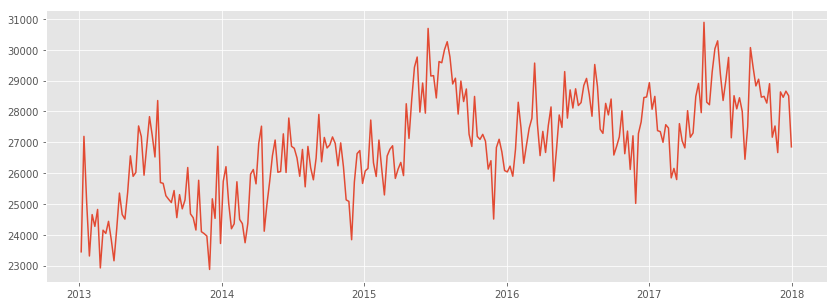

In [129]:
plt.plot(weekly_call_volume)
plt.show()

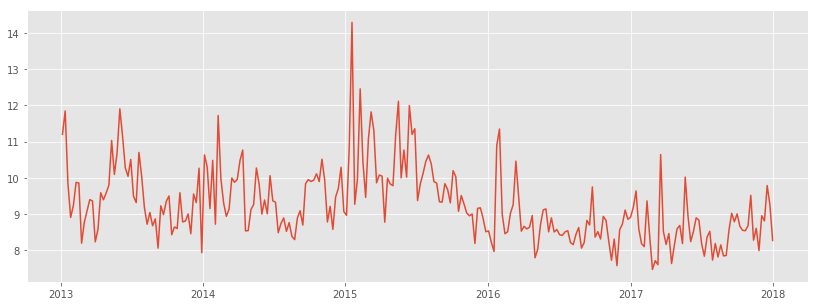

In [130]:
plt.plot(weekly_average_response_time)

In [131]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(ser):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(ser.values)

    # Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    return None

dickey_fuller(weekly_call_volume), print('\n'), dickey_fuller(weekly_average_response_time)

Results of Dickey-Fuller Test:
Test Statistic                  -2.774700
p-value                          0.061980
#Lags Used                       3.000000
Number of Observations Used    257.000000
Critical Value (1%)             -3.456054
Critical Value (5%)             -2.872853
Critical Value (10%)            -2.572799
dtype: float64


Results of Dickey-Fuller Test:
Test Statistic                  -3.759599
p-value                          0.003349
#Lags Used                       3.000000
Number of Observations Used    257.000000
Critical Value (1%)             -3.456054
Critical Value (5%)             -2.872853
Critical Value (10%)            -2.572799
dtype: float64


(None, None, None)

In [132]:
dickey_fuller(daily_average_response_time), dickey_fuller(daily_call_volume)

Results of Dickey-Fuller Test:
Test Statistic                   -4.825441
p-value                           0.000049
#Lags Used                       23.000000
Number of Observations Used    1802.000000
Critical Value (1%)              -3.433984
Critical Value (5%)              -2.863145
Critical Value (10%)             -2.567625
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   -2.971561
p-value                           0.037637
#Lags Used                       25.000000
Number of Observations Used    1800.000000
Critical Value (1%)              -3.433988
Critical Value (5%)              -2.863147
Critical Value (10%)             -2.567626
dtype: float64


(None, None)

At first glance, we get a decent P-val for our stationarity check, but we know we can do better. There must be seasonality to our data.

In [133]:
# for year in [2013, 2014, 2015, 2016, 2017]:
#     print('\n' + str(year) + '\n')
#     print(dickey_fuller(weekly_average_response_time['{}-01-01'.format(str(year)):'{}-12-31'.format(str(year))]))

In [134]:
def rolling_statistics(timeseries):
    rolmean = timeseries.rolling(window = 8, center = False).mean()
    rolstd = timeseries.rolling(window = 8, center = False).std()
    fig = plt.figure(figsize=(12,7))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

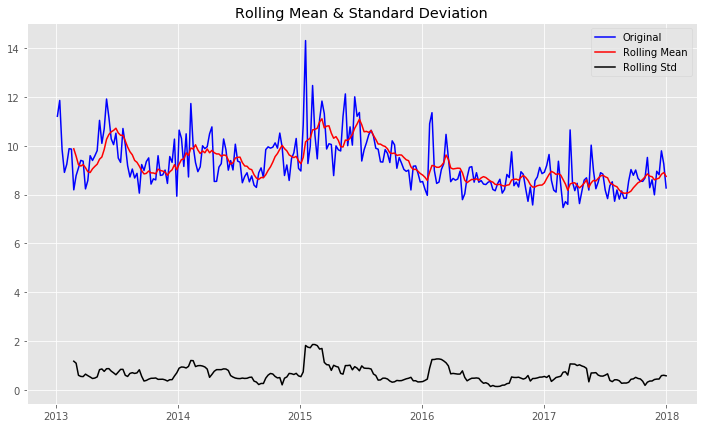

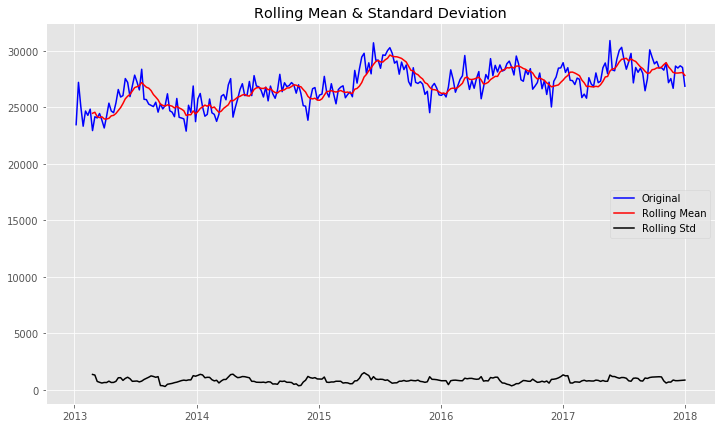

In [135]:
rolling_statistics(weekly_average_response_time)
rolling_statistics(weekly_call_volume)

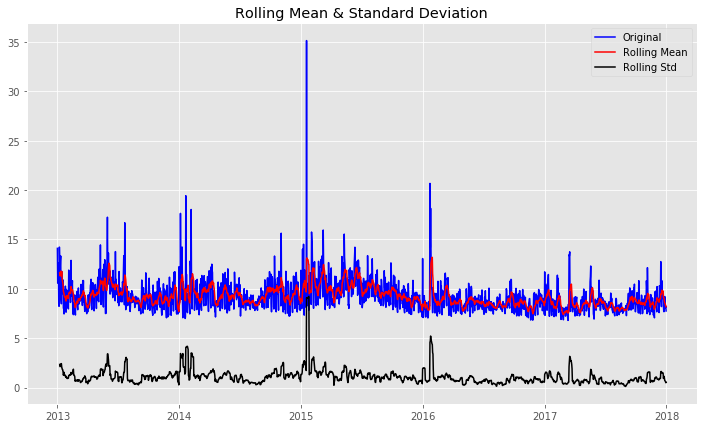

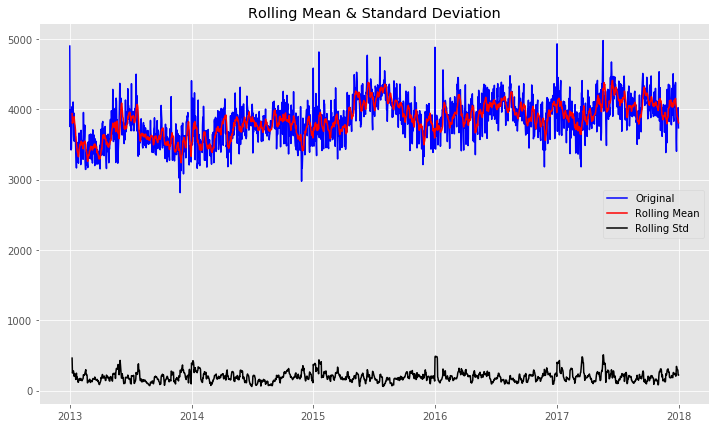

In [136]:
rolling_statistics(daily_average_response_time)
rolling_statistics(daily_call_volume)

<Figure size 1008x360 with 0 Axes>

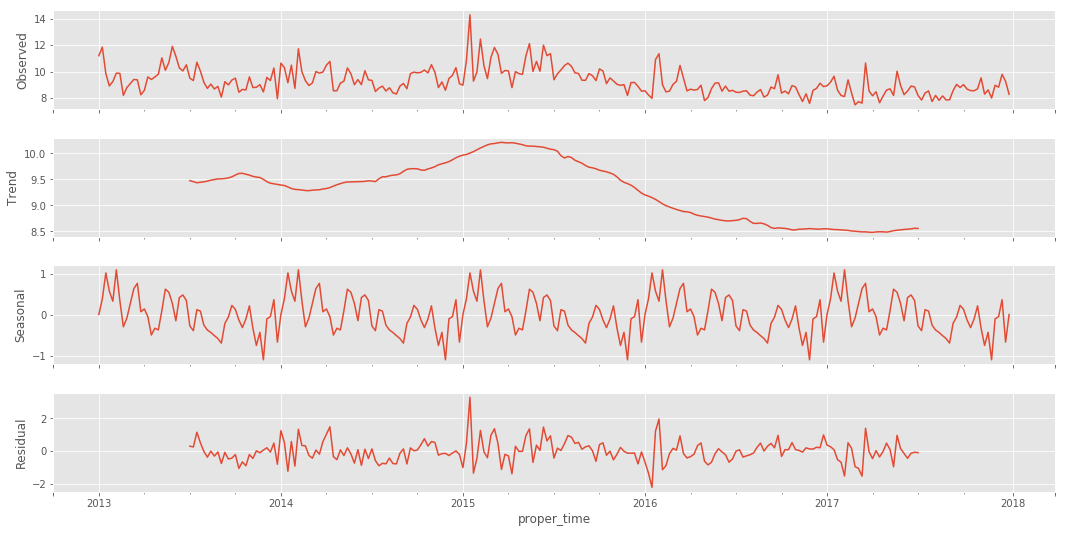

In [137]:
decomposition = seasonal_decompose(weekly_average_response_time, freq=52)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

<Figure size 1008x360 with 0 Axes>

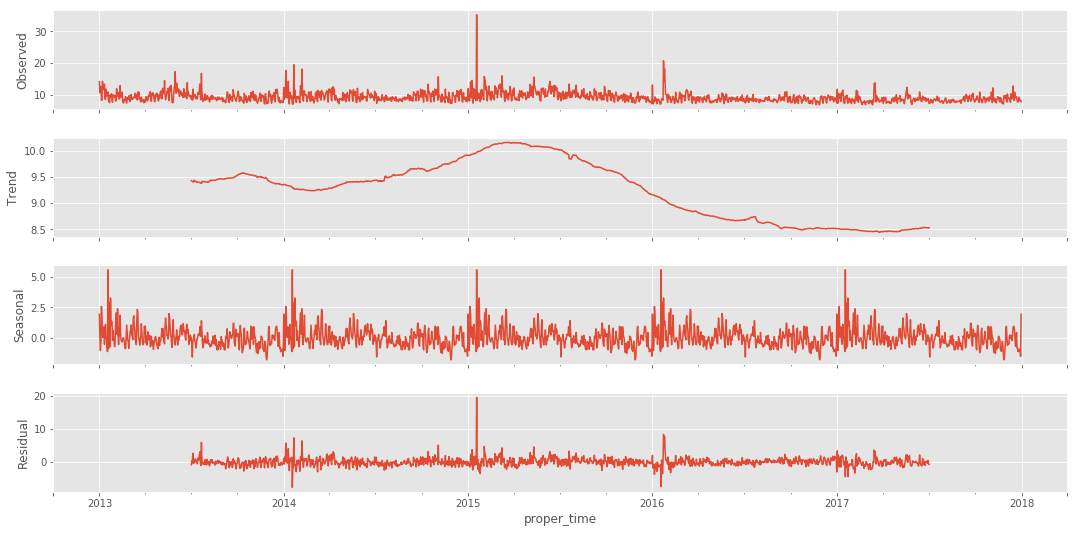

In [138]:
decomposition = seasonal_decompose(daily_average_response_time, freq=365)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

## Differencing

We take the first difference between weeks to improve stationarity. We tried taking a seasonal difference, but it didn't improve our DF score.

In [139]:
# Log mode:
# weekly_average_response_time = weekly_average_response_time.apply(lambda x: np.log(x))
# Tried this, didn't help.

In [140]:
week_first_diff = weekly_average_response_time - weekly_average_response_time.shift(1)

In [141]:
daily_first_diff = daily_average_response_time - daily_average_response_time.shift(1)

In [142]:
week_first_diff = week_first_diff.dropna()
dickey_fuller(week_first_diff)

Results of Dickey-Fuller Test:
Test Statistic                -9.955514e+00
p-value                        2.450230e-17
#Lags Used                     5.000000e+00
Number of Observations Used    2.540000e+02
Critical Value (1%)           -3.456360e+00
Critical Value (5%)           -2.872987e+00
Critical Value (10%)          -2.572870e+00
dtype: float64


In [143]:
daily_first_diff = daily_first_diff.dropna()
dickey_fuller(daily_first_diff)

Results of Dickey-Fuller Test:
Test Statistic                -1.357415e+01
p-value                        2.185929e-25
#Lags Used                     2.500000e+01
Number of Observations Used    1.799000e+03
Critical Value (1%)           -3.433990e+00
Critical Value (5%)           -2.863148e+00
Critical Value (10%)          -2.567626e+00
dtype: float64


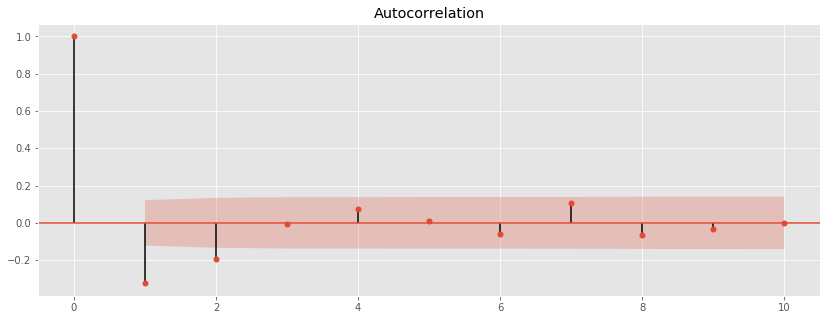

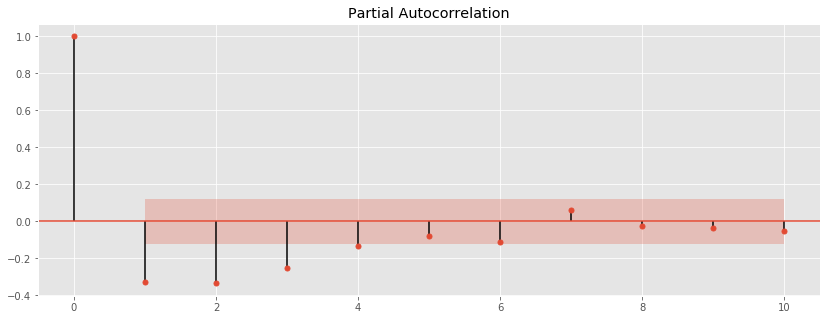

In [144]:
rcParams['figure.figsize'] = 14, 5
plot_acf(week_first_diff, lags = 10);

rcParams['figure.figsize'] = 14, 5
plot_pacf(week_first_diff, lags = 10);

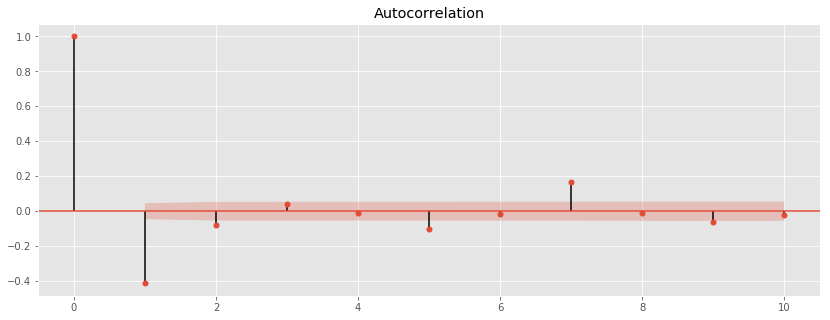

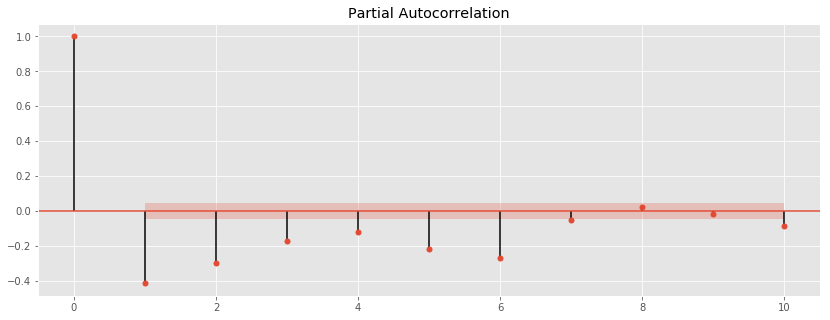

In [145]:
rcParams['figure.figsize'] = 14, 5
plot_acf(daily_first_diff, lags = 10);

rcParams['figure.figsize'] = 14, 5
plot_pacf(daily_first_diff, lags = 10);

### Seasonal Difference:

In [146]:
weekly_seasonal_difference = (weekly_average_response_time - weekly_average_response_time.shift(52)).dropna()

In [147]:
daily_seasonal_difference = (daily_average_response_time - daily_average_response_time.shift(52)).dropna()

In [148]:
dickey_fuller(weekly_seasonal_difference)

Results of Dickey-Fuller Test:
Test Statistic                  -2.069017
p-value                          0.257154
#Lags Used                       6.000000
Number of Observations Used    202.000000
Critical Value (1%)             -3.463144
Critical Value (5%)             -2.875957
Critical Value (10%)            -2.574455
dtype: float64


In [149]:
dickey_fuller(daily_seasonal_difference)

Results of Dickey-Fuller Test:
Test Statistic                -7.351159e+00
p-value                        1.005156e-10
#Lags Used                     2.200000e+01
Number of Observations Used    1.751000e+03
Critical Value (1%)           -3.434090e+00
Critical Value (5%)           -2.863192e+00
Critical Value (10%)          -2.567649e+00
dtype: float64


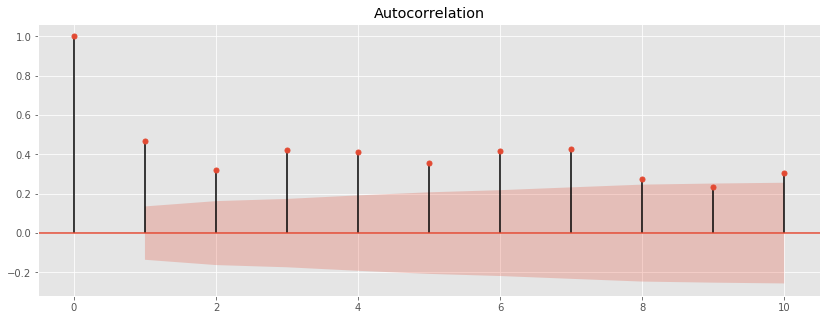

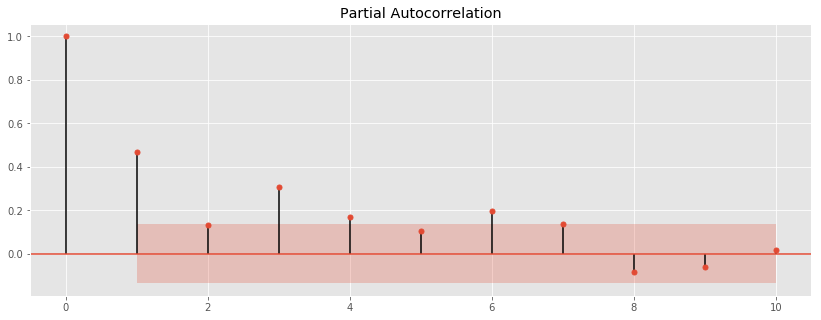

In [150]:
rcParams['figure.figsize'] = 14, 5
plot_acf(weekly_seasonal_difference, lags = 10);

rcParams['figure.figsize'] = 14, 5
plot_pacf(weekly_seasonal_difference, lags = 10);

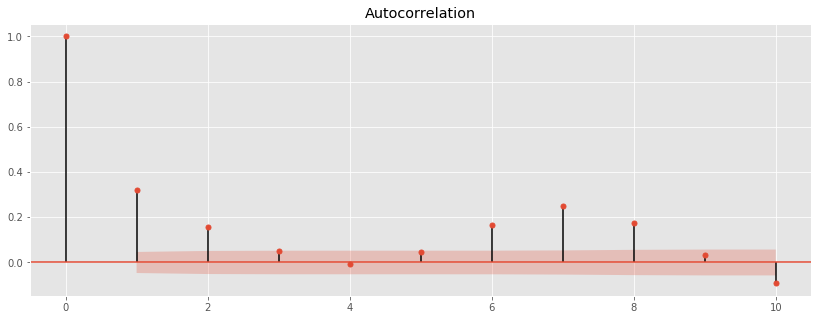

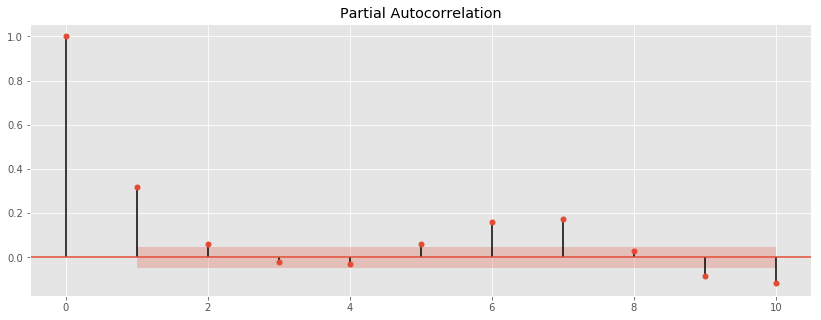

In [151]:
rcParams['figure.figsize'] = 14, 5
plot_acf(daily_seasonal_difference, lags = 10);

rcParams['figure.figsize'] = 14, 5
plot_pacf(daily_seasonal_difference, lags = 10);

### Seasonal FIRST Differences

In [152]:
weekly_seasonal_first_difference = (week_first_diff - week_first_diff.shift(52)).dropna()

In [153]:
daily_seasonal_first_difference = (daily_first_diff - daily_first_diff.shift(52)).dropna()

In [154]:
dickey_fuller(weekly_seasonal_first_difference)

Results of Dickey-Fuller Test:
Test Statistic                -1.025001e+01
p-value                        4.511493e-18
#Lags Used                     5.000000e+00
Number of Observations Used    2.020000e+02
Critical Value (1%)           -3.463144e+00
Critical Value (5%)           -2.875957e+00
Critical Value (10%)          -2.574455e+00
dtype: float64


In [155]:
dickey_fuller(daily_seasonal_first_difference)

Results of Dickey-Fuller Test:
Test Statistic                -1.377476e+01
p-value                        9.535968e-26
#Lags Used                     2.500000e+01
Number of Observations Used    1.747000e+03
Critical Value (1%)           -3.434099e+00
Critical Value (5%)           -2.863196e+00
Critical Value (10%)          -2.567652e+00
dtype: float64


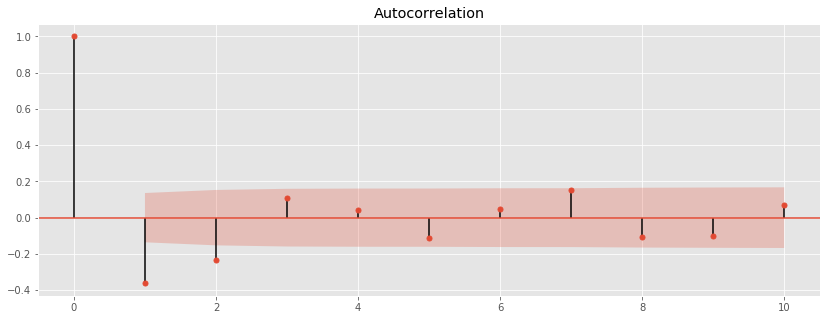

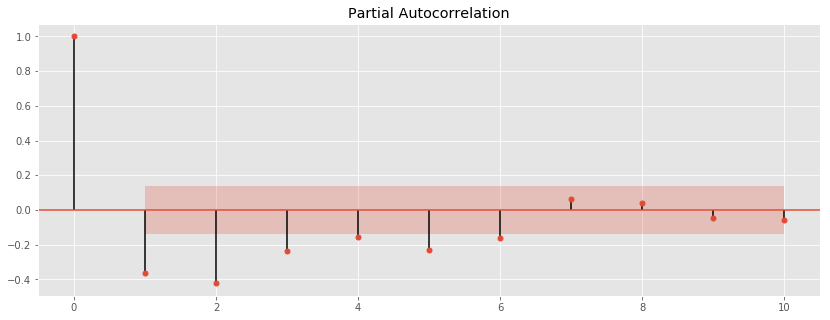

In [156]:
rcParams['figure.figsize'] = 14, 5
plot_acf(weekly_seasonal_first_difference, lags = 10);

rcParams['figure.figsize'] = 14, 5
plot_pacf(weekly_seasonal_first_difference, lags = 10);

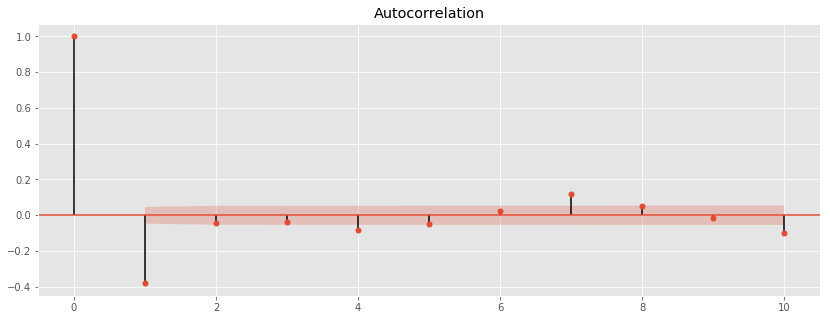

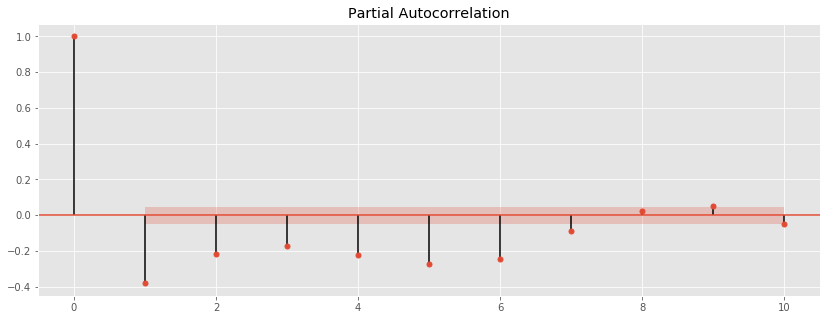

In [157]:
rcParams['figure.figsize'] = 14, 5
plot_acf(daily_seasonal_first_difference, lags = 10);

rcParams['figure.figsize'] = 14, 5
plot_pacf(daily_seasonal_first_difference, lags = 10);

## Messing with SARIMA

### Training a SARIMAX Model

#### Step 1: Find ideal params

In [158]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [105]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(weekly_average_response_time,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}52 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 52)52 : AIC Calculated =4028.716449903293
ARIMA (0, 0, 0) x (0, 0, 1, 52)52 : AIC Calculated =3046.6997684104126
ARIMA (0, 0, 0) x (0, 1, 0, 52)52 : AIC Calculated =2428.727163160701
ARIMA (0, 0, 0) x (0, 1, 1, 52)52 : AIC Calculated =1787.2446790806416
ARIMA (0, 0, 0) x (1, 0, 0, 52)52 : AIC Calculated =2429.4648397976525
ARIMA (0, 0, 0) x (1, 0, 1, 52)52 : AIC Calculated =2335.0330041332336
ARIMA (0, 0, 0) x (1, 1, 0, 52)52 : AIC Calculated =1817.1632354567612
ARIMA (0, 0, 0) x (1, 1, 1, 52)52 : AIC Calculated =1787.9797931748012
ARIMA (0, 0, 1) x (0, 0, 0, 52)52 : AIC Calculated =3692.000617703836
ARIMA (0, 0, 1) x (0, 0, 1, 52)52 : AIC Calculated =2807.713762680702
ARIMA (0, 0, 1) x (0, 1, 0, 52)52 : AIC Calculated =2376.195558260569
ARIMA (0, 0, 1) x (0, 1, 1, 52)52 : AIC Calculated =1729.8123019683426
ARIMA (0, 0, 1) x (1, 0, 0, 52)52 : AIC Calculated =2390.0551474405893
ARIMA (0, 0, 1) x (1, 0, 1, 52)52 : AIC Calculated =2380.069289378146
ARIMA (0, 0,

In [159]:
# Find the parameters with minimal AIC value.

ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 0, 1)
pdqs    (0, 1, 1, 52)
aic           1681.96
Name: 43, dtype: object

Now plug ideal params into SARIMAX model:

In [160]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(weekly_average_response_time,
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9863      0.021     46.746      0.000       0.945       1.028
ma.L1         -0.8282      0.041    -20.102      0.000      -0.909      -0.747
ma.S.L52      -1.0000   1149.194     -0.001      0.999   -2253.379    2251.379
sigma2         0.5862    673.680      0.001      0.999   -1319.803    1320.975


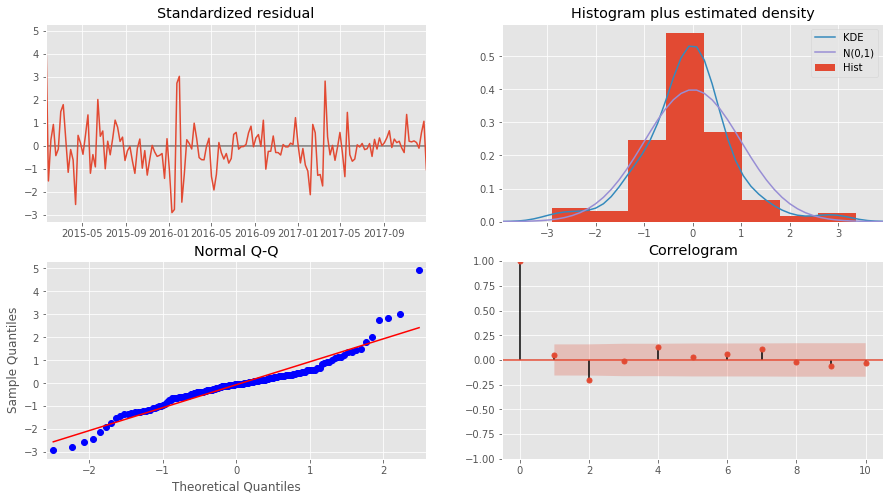

In [161]:
output.plot_diagnostics(figsize=(15, 8))
plt.show()

In [162]:
# Get dynamic predictions with confidence intervals as above.

pred_dynamic = output.get_prediction(start = weekly_average_response_time.index[-50],
                                     dynamic = True, 
                                     full_results = True)

pred_dynamic_conf = pred_dynamic.conf_int()

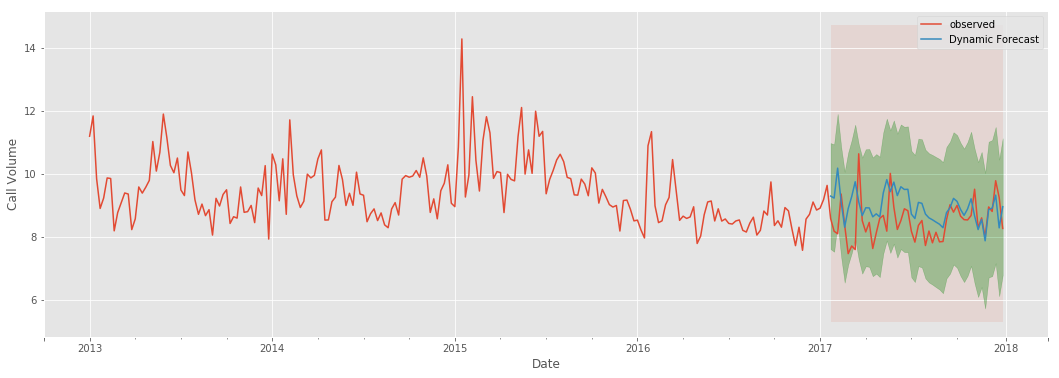

In [181]:
# Plot the dynamic forecast with confidence intervals.

ax = weekly_average_response_time.plot(label='observed', figsize=(18, 6))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 weekly_average_response_time[-50:-49].index[0], 
                 '2017-12-31', 
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Call Volume')

plt.legend()
plt.show()